In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTNjMOyCRBqv9FvzmgOQBoogluqfHwlx2CfX2IZvZ_Y-Codvpll_AQCxDb3VDrJNRxD0aBrHD8b-VGe/pub?output=csv')
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [ ]:
df.tail()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True
12574,TXN_2407494,CUST_23,Food,Item_9_FOOD,17.0,3.0,51.0,Cash,Online,2022-08-06,NaN


In [ ]:
df.shape

(12575, 11)

# Data Profile

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


In [ ]:
df.describe(include='object')

,Transaction ID,Customer ID,Category,Item,Payment Method,Location,Transaction Date,Discount Applied
count,12575,12575,12575,11362,12575,12575,12575,8376
unique,12575,25,8,200,3,2,1114,2
top,TXN_6867343,CUST_05,Furniture,Item_2_BEV,Cash,Online,2022-05-30,True
freq,1,544,1591,126,4310,6354,26,4219


# Data Preprocessing

In [ ]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied'],
      dtype='object')

For next analysis in sql: use all lowercase for column and table names and to separate words with an underscore (“_”)

In [ ]:
df.rename(columns={"Transaction ID":"transaction_id",
                   "Customer ID":"customer_id",
                   "Category": "category",
                   "Item": "item",
                   "Price Per Unit":"price_per_unit",
                   "Quantity": "quantity",
                   "Total Spent":"total_spent",
                   "Payment Method":"payment_method",
                   "Location":"location",
                   "Transaction Date":"date",
                   "Discount Applied":"discount"},
          inplace=True)

In [ ]:
df.columns

Index(['transaction_id', 'customer_id', 'category', 'item', 'price_per_unit',
       'quantity', 'total_spent', 'payment_method', 'location', 'date',
       'discount'],
      dtype='object')

Changing the type of date from object datatype -> datetime

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# check if changes worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  12575 non-null  object        
 1   customer_id     12575 non-null  object        
 2   category        12575 non-null  object        
 3   item            11362 non-null  object        
 4   price_per_unit  11966 non-null  float64       
 5   quantity        11971 non-null  float64       
 6   total_spent     11971 non-null  float64       
 7   payment_method  12575 non-null  object        
 8   location        12575 non-null  object        
 9   date            12575 non-null  datetime64[ns]
 10  discount        8376 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.1+ MB


In [ ]:
# Missing values analysis
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
}).reset_index(drop=True)

missing_df

,Column,Missing Values,Missing Percentage (%)
0,transaction_id,0,0.000000
1,customer_id,0,0.000000
2,category,0,0.000000
3,item,1213,9.646123
4,price_per_unit,609,4.842942
5,quantity,604,4.803181
6,total_spent,604,4.803181
7,payment_method,0,0.000000
8,location,0,0.000000
9,date,0,0.000000


**1. Missing Value Summary**
| Column            | Missing Values | Missing Percentage (%) | Handling Strategy |
|------------------|---------------|------------------------|-------------------|
| **item**        | 1,213         | **9.65%**               | Imputed using **mode (most common item)** |
| **price_per_unit** | 609          | **4.84%**               | Imputed using **median** |
| **quantity**     | 604           | **4.80%**               | Imputed using **median** |
| **total_spent**  | 604           | **4.80%**               | Imputed using **median** |
| **discount** | 4,199      | **33.39%**              | Imputed using **False** |

---

**2. Missing Value Handling**
- **Columns with <5% missing**  
  - `"price_per_unit"`, `"quantity"`, `"total_Spent"` → **Imputed with median** (no major data loss, maintains revenue accuracy).  

- **Columns with 5–20% missing**  
  - `"item"` (9.65%) → **Imputed using mode (most frequent item)** instead of median because it's categorical.  
  - This ensures consistency, but we should check whether imputed values make sense for product categories.  

- **Columns with >20% missing**  
  - `"discount"` (33.39%) → **Imputed with "False"** assuming missing values mean no discount was applied.  
  - **Key Benefit:** Allows discount impact analysis to remain valid.

---

**3. Impact of Adjusted Handling**
✅ **Revenue calculations remain accurate** (all financial fields are properly imputed).  
✅ **Item column retains categorical integrity** using mode instead of median.  
✅ **Discount analysis remains valid** after imputing missing values with `"False"`.  
⚠ **Potential category bias in "Item" imputations** (needs validation if mode-based replacement makes sense).  

In [ ]:
# Handling missing values
# Columns with <5% missing: Impute with median
df["price_per_unit"].fillna(df["price_per_unit"].median(), inplace=True)
df["quantity"].fillna(df["quantity"].median(), inplace=True)
df["total_spent"].fillna(df["total_spent"].median(), inplace=True)

# Columns with 5-20% missing: Impute with mode
df["item"].fillna(df["item"].mode()[0], inplace=True)

# Columns with >20% missing: Assume missing values mean no discount
df["discount"].fillna("False", inplace=True)

In [ ]:
df.head()

,transaction_id,customer_id,category,item,price_per_unit,quantity,total_spent,payment_method,location,date,discount
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,False
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [ ]:
df.duplicated().sum()
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
0


Verify the changes

In [ ]:
print("\nDataset after Cleaning:")
df.isna().sum()


Dataset after Cleaning:


,0
transaction_id,0
customer_id,0
category,0
item,0
price_per_unit,0
quantity,0
total_spent,0
payment_method,0
location,0
date,0


In [ ]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('retail_cleaned.csv', index=False)
print("Cleaned dataset saved to 'retail_cleaned.csv'")

Cleaned dataset saved to 'retail_cleaned.csv'


# Data Aggregation

In [ ]:
# 1. Total Revenue by Category
category_revenue = df.pivot_table(values='total_spent', index='category', aggfunc='sum').sort_values(by='total_spent', ascending=False)
category_revenue

,total_spent
category,
Butchers,215930.0
Electric household essentials,211951.0
Beverages,204751.0
Food,203600.5
Furniture,202471.0
Computers and electric accessories,199481.0
Patisserie,191605.0
Milk Products,187815.5


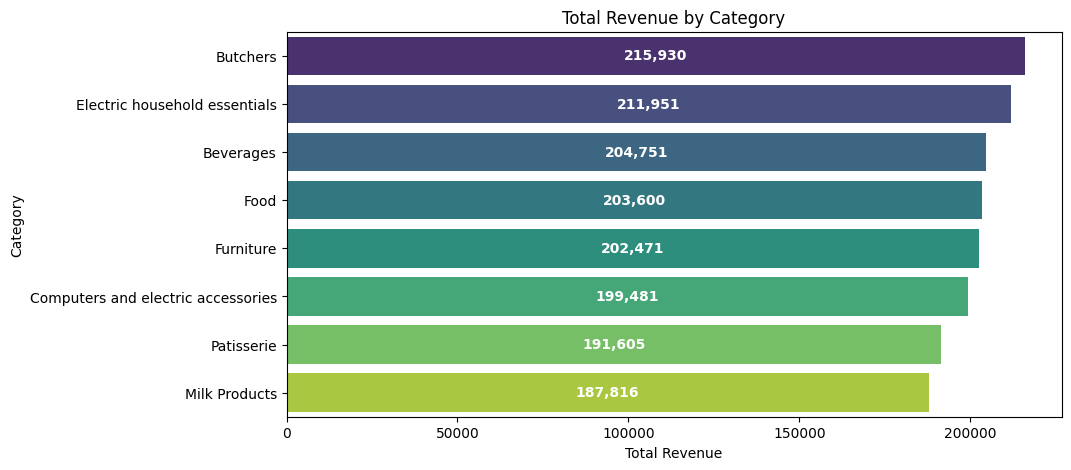

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(y=category_revenue.index, x=category_revenue['total_spent'], palette='viridis')
plt.title('Total Revenue by Category')
plt.xlabel('Total Revenue')
plt.ylabel('Category')

# Show value labels inside bars
for container in ax.containers:
    ax.bar_label(container, labels=[format_number(val) for val in container.datavalues], label_type='center', color='white', fontsize=10, weight='bold')

plt.show()

In [ ]:
# 2. Average Order Value (AOV) by Category
aov_category = df.pivot_table(values='total_spent', index='category', aggfunc='mean').sort_values(by='total_spent', ascending=False)
aov_category

,total_spent
category,
Butchers,137.710459
Electric household essentials,133.218730
Beverages,130.664327
Food,128.211902
Computers and electric accessories,128.036585
Furniture,127.260214
Patisserie,125.395942
Milk Products,118.570391


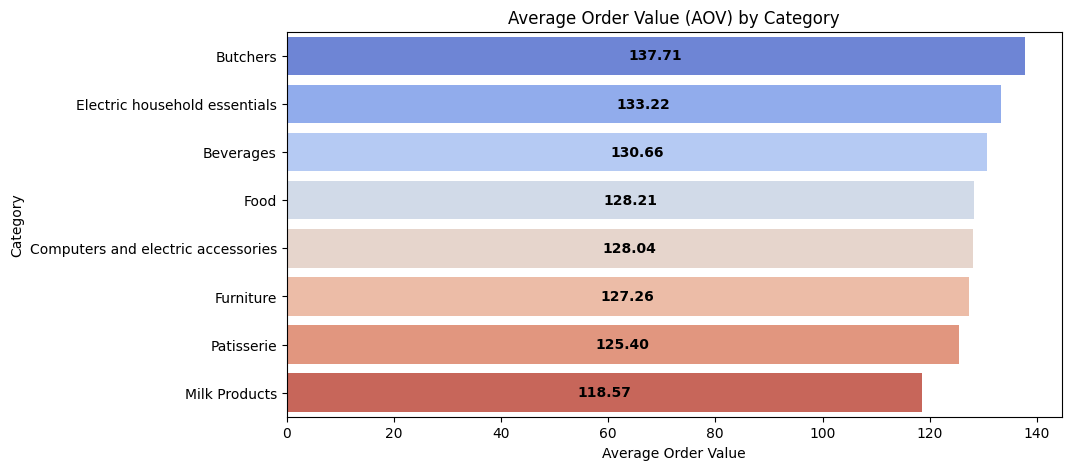

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(y=aov_category.index, x=aov_category['total_spent'], palette='coolwarm')
plt.title('Average Order Value (AOV) by Category')
plt.xlabel('Average Order Value')
plt.ylabel('Category')

# Show value labels inside bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color='black', fontsize=10, weight='bold')

plt.show()


In [ ]:
# 3. Total Sales by Payment Method
payment_sales = df.pivot_table(values='total_spent', index='payment_method', aggfunc='sum').sort_values(by='total_spent', ascending=False)
payment_sales

,total_spent
payment_method,
Cash,560169.5
Digital Wallet,529304.5
Credit Card,528131.0


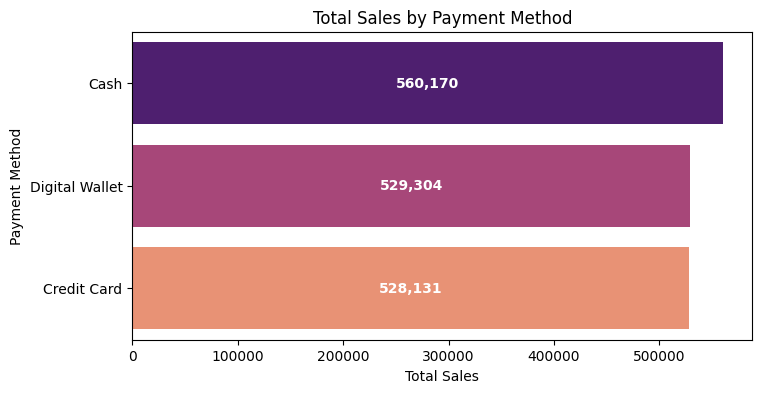

In [ ]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(y=payment_sales.index, x=payment_sales['total_spent'], palette='magma')
plt.title('Total Sales by Payment Method')
plt.xlabel('Total Sales')
plt.ylabel('Payment Method')

# Show value labels inside bars
for container in ax.containers:
    ax.bar_label(container, labels=[format_number(val) for val in container.datavalues], label_type='center', color='white', fontsize=10, weight='bold')

plt.show()

In [ ]:
# 4. Customer Lifetime Value (CLV)
customer_lifetime_value = df.pivot_table(values='total_spent', index='customer_id', aggfunc='sum').sort_values(by='total_spent', ascending=False).head(10)
customer_lifetime_value

,total_spent
customer_id,
CUST_24,71056.0
CUST_08,70172.5
CUST_05,70012.5
CUST_23,67979.0
CUST_13,67858.0
CUST_16,67849.0
CUST_10,65325.5
CUST_21,65320.0
CUST_15,65070.5


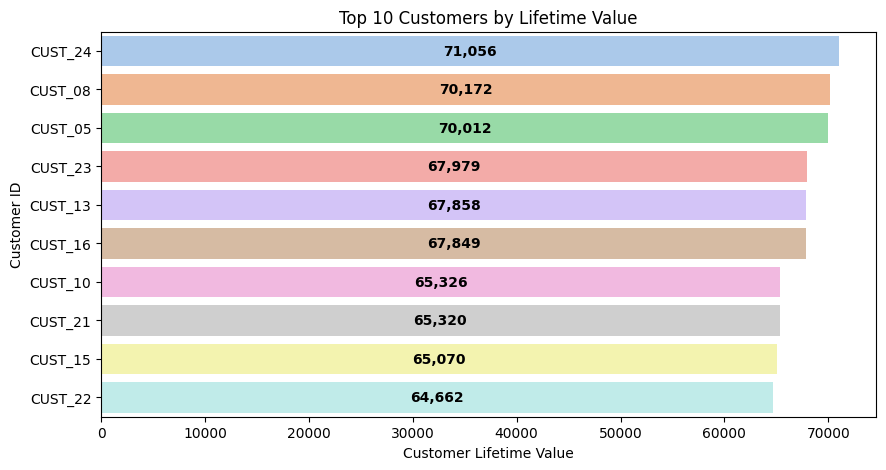

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(y=customer_lifetime_value.index, x=customer_lifetime_value['total_spent'], palette='pastel')
plt.title('Top 10 Customers by Lifetime Value')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Customer ID')

# Show value labels inside bars
for container in ax.containers:
    ax.bar_label(container, labels=[format_number(val) for val in container.datavalues], label_type='center', color='black', fontsize=10, weight='bold')

plt.show()

In [ ]:
# 5. Monthly Sales Trend
monthly_sales = df.pivot_table(values='total_spent', index=df['date'].dt.to_period('M'), aggfunc='sum')
monthly_sales

,total_spent
date,
2022-01,55298.5
2022-02,45278.5
2022-03,42515.0
2022-04,41744.0
2022-05,41975.0
2022-06,44420.5
2022-07,46858.5
2022-08,43069.5
2022-09,47307.0


<Figure size 1200x600 with 0 Axes>

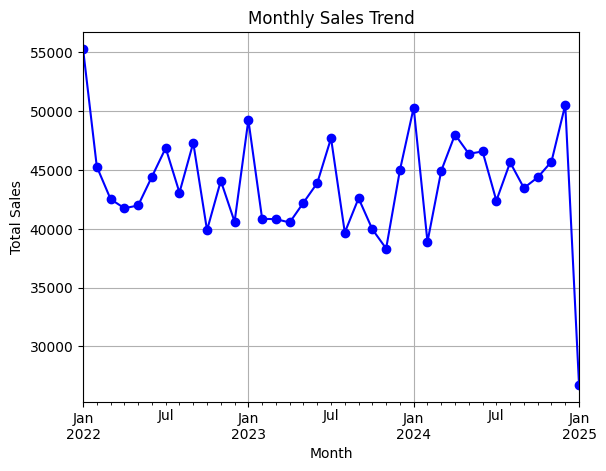

In [ ]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='b', legend=False)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


In [ ]:
# 6. Sales by Discount Status
discount_impact = df.pivot_table(values='total_spent', index='discount', aggfunc='sum')
discount_impact

,total_spent
discount,
False,536075.5
True,546143.5
False,535386.0


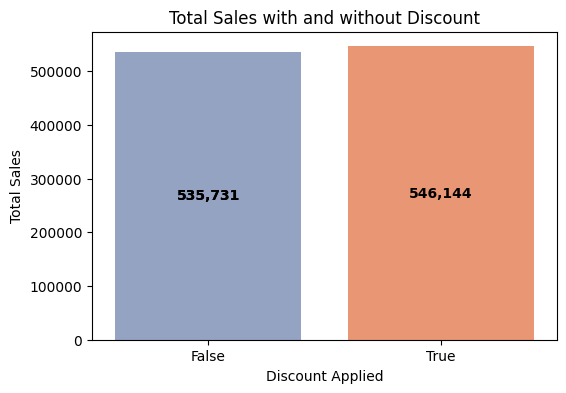

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=discount_impact.index, y=discount_impact['total_spent'], palette='Set2')
plt.title('Total Sales with and without Discount')
plt.xlabel('Discount Applied')
plt.ylabel('Total Sales')

# Show value labels inside bars
for container in ax.containers:
    ax.bar_label(container, labels=[format_number(val) for val in container.datavalues], label_type='center', color='black', fontsize=10, weight='bold')

plt.show()

In [ ]:
# 7. Sales Distribution by Location
location_sales = df.pivot_table(values='total_spent', index='location', aggfunc='sum').sort_values(by='total_spent', ascending=False)
location_sales

,total_spent
location,
Online,822432.0
In-store,795173.0


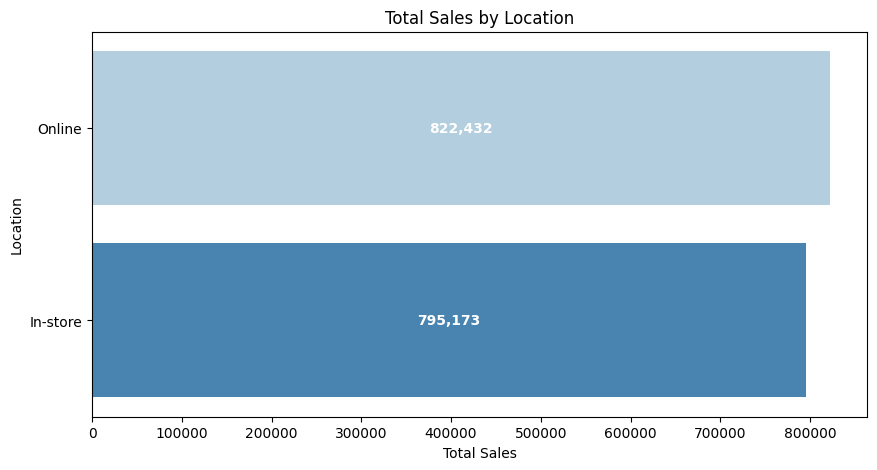

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(y=location_sales.index, x=location_sales['total_spent'], palette='Blues')
plt.title('Total Sales by Location')
plt.xlabel('Total Sales')
plt.ylabel('Location')

# Show value labels inside bars
for container in ax.containers:
    ax.bar_label(container, labels=[format_number(val) for val in container.datavalues], label_type='center', color='white', fontsize=10, weight='bold')

plt.show()

# Data Extraction

In [ ]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('retail_cleaned.csv', index=False)
print("Cleaned dataset saved to 'retail_cleaned.csv'")

Cleaned dataset saved to 'retail_cleaned.csv'
